# Mini Project - Job Salaries Dataset EDA

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
# for plotting confusion matrix
from sklearn.metrics import confusion_matrix
from collections import Counter
import collections

## EDA - Exploring Data Variables

In [2]:
dsdata = pd.read_csv('new_ds_salaries.csv')
dsdata.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
dsdata.head()

,Index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_group,experience_levelN,company_sizeN,employment_typeN,company_continent,employee_continent,job_type,domain
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,low-mid,1,2,1,EUROPE,EUROPE,Scientist,Data science
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,high,2,0,1,ASIA,ASIA,Scientist,Machine Learning
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,1,GB,M,low-mid,2,1,1,EUROPE,EUROPE,Engineer,Data science
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,low,1,0,1,NORTH AMERICA,NORTH AMERICA,Analyst,Data science
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,1,US,L,mid,2,2,1,NORTH AMERICA,NORTH AMERICA,Engineer,Machine Learning


In [3]:
dsdata.describe()

,Index,work_year,salary,salary_in_usd,remote_ratio,experience_levelN,company_sizeN,employment_typeN
count,607.000000,607.000000,6.070000e+02,607.000000,607.000000,607.000000,607.000000,607.000000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,1.418451,1.401977,1.189456,1.004942
std,175.370085,0.692133,1.544357e+06,70957.259411,0.814183,0.785510,0.654021,0.226121
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.000000,0.000000,0.000000,0.000000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,1.000000,1.000000,1.000000,1.000000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,2.000000,2.000000,1.000000,1.000000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,2.000000,2.000000,2.000000,1.000000
max,606.000000,2022.000000,3.040000e+07,600000.000000,2.000000,3.000000,2.000000,3.000000


In [4]:
dsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Index               607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
 12  salary_group        606 non-null    object
 13  experience_levelN   607 non-null    int64 
 14  company_sizeN       607 non-null    int64 
 15  employment_typeN    607 non-null    int64 
 16  company_continent   607 no

In [5]:
dsdata.isna().sum()

Index                 0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
salary_group          1
experience_levelN     0
company_sizeN         0
employment_typeN      0
company_continent     0
employee_continent    0
job_type              0
domain                0
dtype: int64

In [6]:
dsdata2 = pd.DataFrame()
for index, row in dsdata.iterrows():
    if(row['job_title'] == 'Data Scientist'):
        # print out the salary currency, salary_in_usd and company location for people with the job title as data scientist
        print(row['salary_currency'],row['salary_in_usd'], row['company_location'])
        dsdata2 = dsdata2.append(row, ignore_index = True)

EUR 79833 DE
HUF 35735 HU
EUR 51321 FR
INR 40481 IN
EUR 39916 FR
EUR 68428 US
USD 45760 US
GBP 76958 GB
USD 105000 US
EUR 38776 ES
USD 118000 US
USD 120000 US
USD 138350 US
EUR 21669 IT
USD 412000 US
EUR 62726 DE
EUR 49268 DE
USD 105000 US
EUR 91237 AT
EUR 62726 LU
EUR 42197 FR
EUR 53192 FR
INR 29751 IN
USD 73000 US
USD 50000 NG
INR 9466 IN
EUR 49646 FR
USD 100000 US
USD 80000 US
USD 82500 US
USD 150000 US
CAD 75774 CA
USD 13400 UA
SGD 119059 IL
MXN 2859 MX
CLP 40038 CL
INR 5679 US
EUR 90734 DE
USD 147000 US
EUR 61467 AT
EUR 37825 ES
USD 160000 US
BRL 12901 BR
EUR 90734 DE
GBP 116914 GB
INR 33808 IN
GBP 56256 GB
CAD 87738 CA
EUR 88654 DE
USD 135000 US
EUR 46809 ES
USD 4000 VN
CAD 103691 CA
USD 165000 US
EUR 36643 FR
USD 115000 US
USD 90000 US
INR 28399 IN
USD 130000 US
INR 16904 IN
EUR 25532 DE
EUR 77684 FR
USD 100000 US
USD 58000 US
TRY 20171 TR
USD 109000 US
USD 130000 US
USD 90000 US


C:\Users\s0801\AppData\Local\Temp\ipykernel_3456\982620487.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dsdata2 = dsdata2.append(row, ignore_index = True)
C:\Users\s0801\AppData\Local\Temp\ipykernel_3456\982620487.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dsdata2 = dsdata2.append(row, ignore_index = True)
C:\Users\s0801\AppData\Local\Temp\ipykernel_3456\982620487.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dsdata2 = dsdata2.append(row, ignore_index = True)
C:\Users\s0801\AppData\Local\Temp\ipykernel_3456\982620487.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dsdata2 = dsdata2.append(row, ignore_index = Tr

USD 136620 US
USD 99360 US
GBP 117789 GB
GBP 104702 GB
USD 146000 US
USD 123000 US
GBP 65438 GB
GBP 39263 GB
USD 165220 US
USD 120160 US
USD 180000 US
USD 120000 US
USD 95550 US
USD 167000 US
USD 123000 US
USD 150000 US
USD 211500 US
USD 138600 US
USD 170000 US
USD 123000 US
USD 215300 US
USD 158200 US
USD 180000 US
GBP 71982 GB
GBP 45807 GB
USD 260000 US
USD 180000 US
USD 80000 US
USD 140400 US
USD 215300 US
INR 31615 IN
INR 18442 IN
USD 104890 US
USD 140000 US
USD 220000 US
USD 140000 US
GBP 183228 GB
GBP 91614 GB
USD 185100 US
USD 200000 US
USD 120000 US
USD 230000 US
USD 100000 DZ
USD 100000 US
PLN 35590 PL
USD 100000 US
USD 165000 US
CAD 52396 CA
USD 40000 MY
AUD 86703 AU
USD 48000 US
CHF 122346 CH
CAD 69336 CA
USD 135000 US
USD 78000 US
USD 141300 US
USD 102100 US
USD 205300 US
USD 140400 US
USD 176000 US
USD 144000 US
USD 205300 US
USD 140400 US
USD 140000 US
USD 210000 US
USD 140000 US
USD 210000 US
USD 140000 US
USD 210000 US
USD 140000 US
USD 230000 US
USD 150000 US
USD 21000

C:\Users\s0801\AppData\Local\Temp\ipykernel_3456\982620487.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dsdata2 = dsdata2.append(row, ignore_index = True)
C:\Users\s0801\AppData\Local\Temp\ipykernel_3456\982620487.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dsdata2 = dsdata2.append(row, ignore_index = True)
C:\Users\s0801\AppData\Local\Temp\ipykernel_3456\982620487.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dsdata2 = dsdata2.append(row, ignore_index = True)
C:\Users\s0801\AppData\Local\Temp\ipykernel_3456\982620487.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dsdata2 = dsdata2.append(row, ignore_index = Tr

In [7]:
dsdata2 = dsdata2.drop(columns='Index')
dsdata2.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_group,experience_levelN,company_sizeN,employment_typeN,company_continent,employee_continent,job_type,domain
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,low-mid,1,2,1,EUROPE,EUROPE,Scientist,Data science
1,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,1,HU,L,low,1,2,1,EUROPE,EUROPE,Scientist,Data science
2,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S,low,0,0,1,EUROPE,EUROPE,Scientist,Data science
3,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L,low,1,2,1,ASIA,ASIA,Scientist,Data science
4,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR,M,low,0,1,1,EUROPE,EUROPE,Scientist,Data science


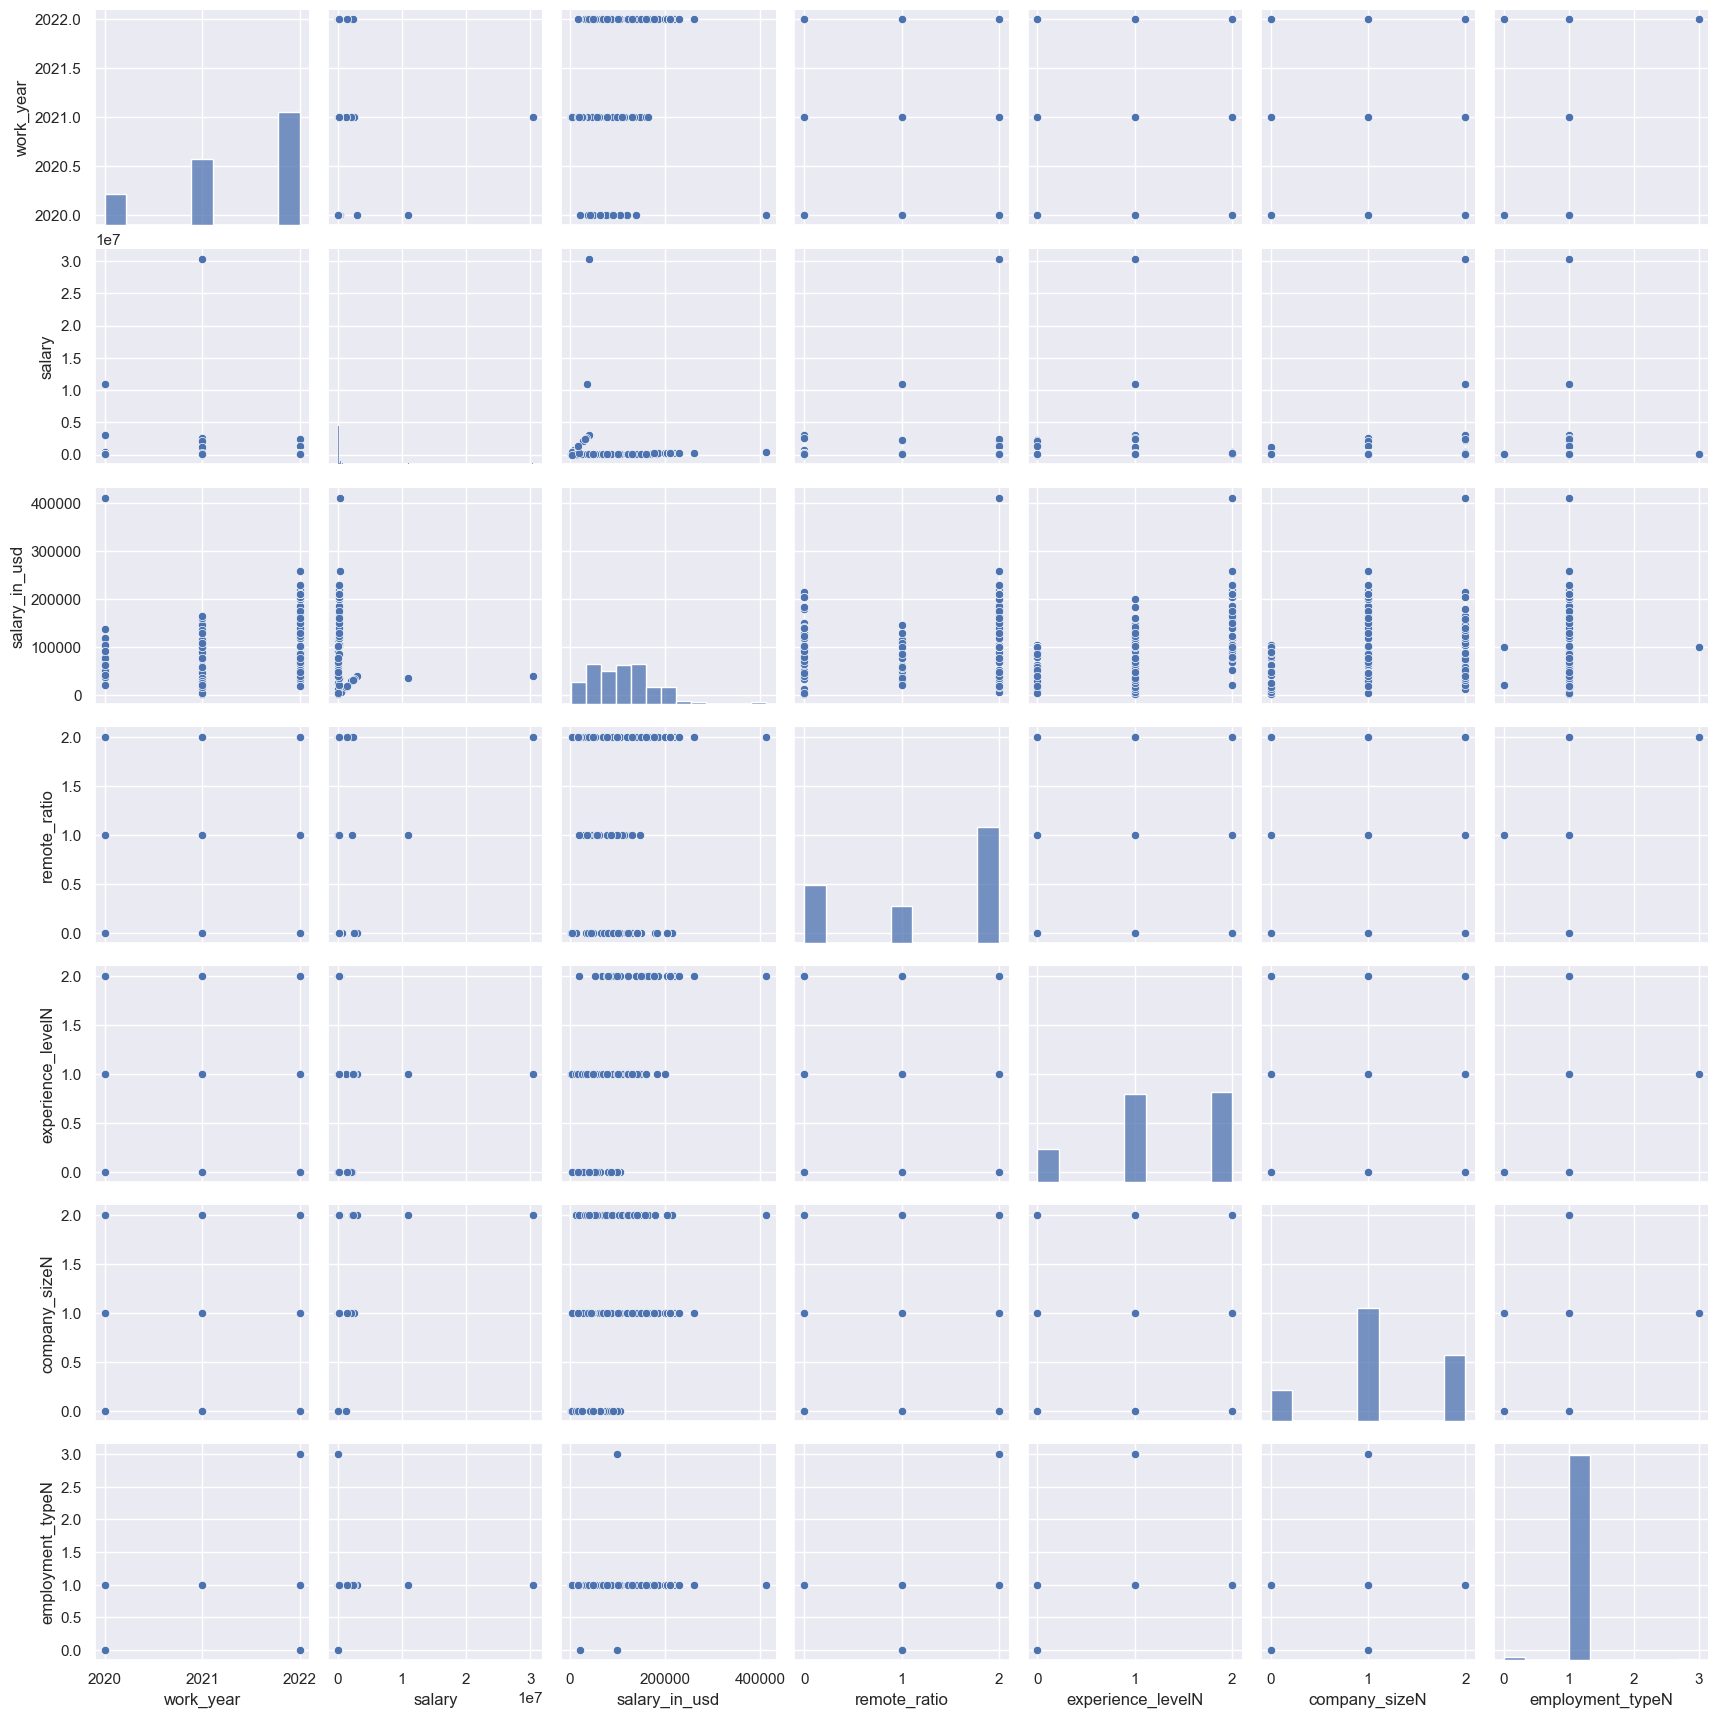

In [8]:
# Relationship between Response and the Predictors
sb.pairplot(data = dsdata2)

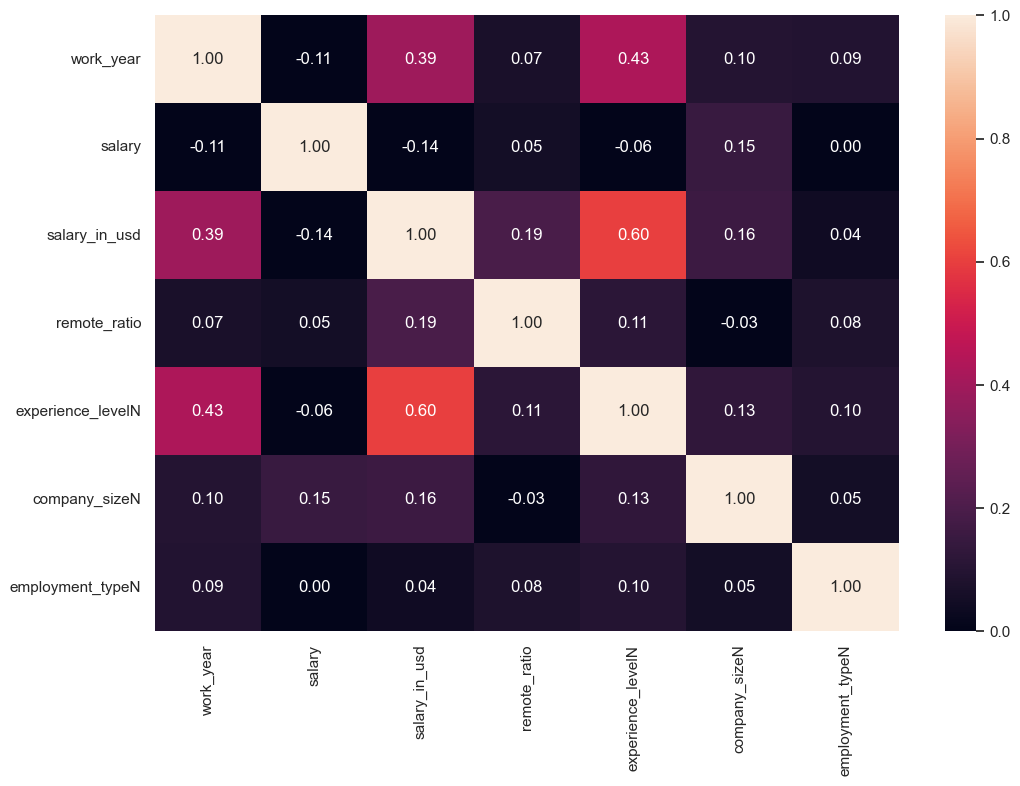

In [9]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(dsdata2.corr(), vmin = 0, vmax = 1, annot = True, fmt = ".2f")
plt.show()

### EDA:Explore the domain of `domain`

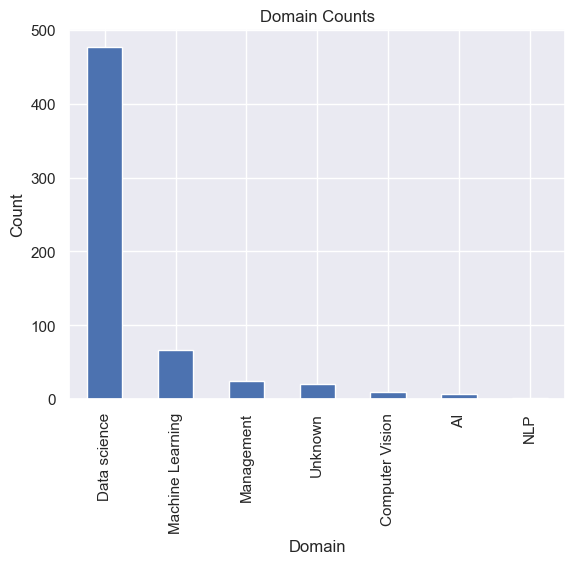

In [10]:
domain = dsdata['domain']
counts = domain.value_counts()
counts.plot(kind='bar')
plt.title('Domain Counts')
plt.xlabel('Domain')
plt.ylabel('Count')
plt.show()

### EDA:Explore the domain of `company_continent` and `employee_continent`

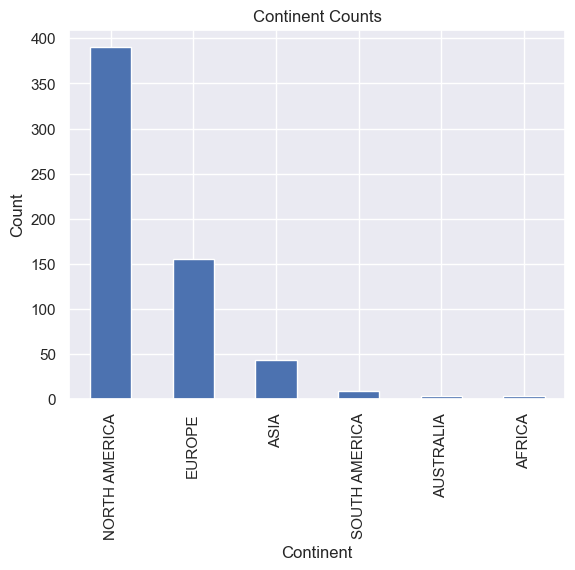

In [11]:
domain = dsdata['company_continent']
counts = domain.value_counts()
counts.plot(kind='bar')
plt.title('Continent Counts')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.show()

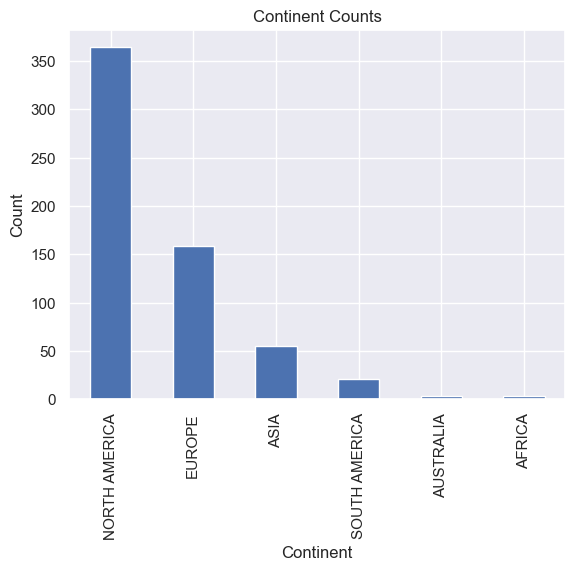

In [12]:
domain = dsdata['employee_continent']
counts = domain.value_counts()
counts.plot(kind='bar')
plt.title('Continent Counts')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.show()

### EDA:Explore the domain of `job_type`

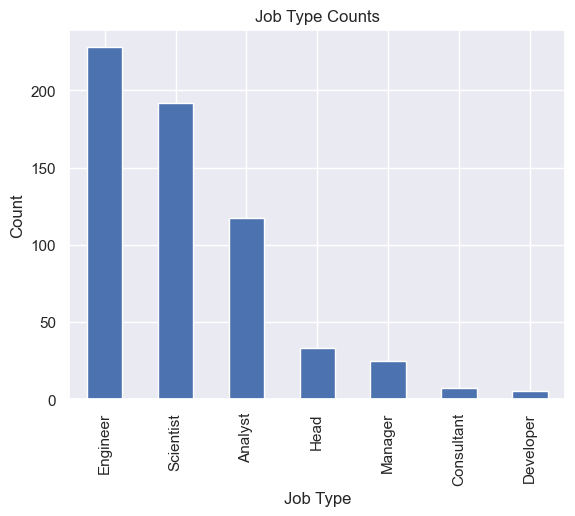

In [13]:
domain = dsdata['job_type']
counts = domain.value_counts()
counts.plot(kind='bar')
plt.title('Job Type Counts')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.show()

In [14]:
dsdata.corr()

,Index,work_year,salary,salary_in_usd,remote_ratio,experience_levelN,company_sizeN,employment_typeN
Index,1.000000,0.886550,-0.096250,0.167025,0.095000,0.249966,-0.090137,0.004078
work_year,0.886550,1.000000,-0.087577,0.170493,0.076314,0.294759,-0.078764,-0.012819
salary,-0.096250,-0.087577,1.000000,-0.083906,-0.014608,-0.027517,0.079959,-0.002470
salary_in_usd,0.167025,0.170493,-0.083906,1.000000,0.132122,0.484233,0.151205,0.065747
remote_ratio,0.095000,0.076314,-0.014608,0.132122,1.000000,0.097784,-0.022070,0.015638
experience_levelN,0.249966,0.294759,-0.027517,0.484233,0.097784,1.000000,0.063511,0.081701
company_sizeN,-0.090137,-0.078764,0.079959,0.151205,-0.022070,0.063511,1.000000,0.027133
employment_typeN,0.004078,-0.012819,-0.002470,0.065747,0.015638,0.081701,0.027133,1.000000


### EDA:Explore the domain of `company_size`

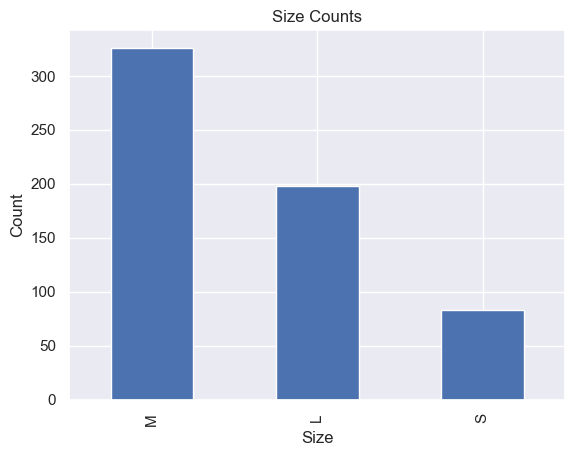

In [15]:
domain = dsdata['company_size']
counts = domain.value_counts()
counts.plot(kind='bar')
plt.title('Size Counts')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

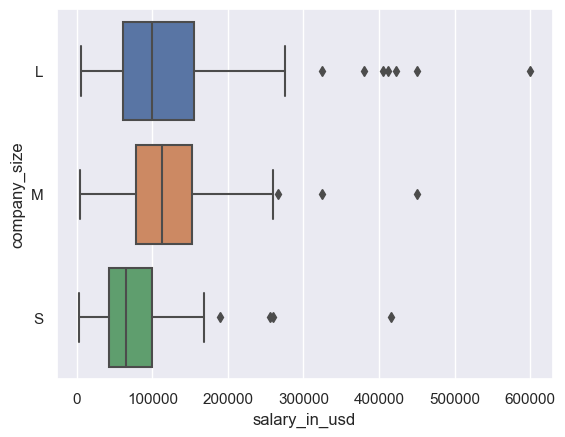

In [16]:
sb.boxplot(data=dsdata, x='salary_in_usd', y='company_size', order=["L", "M", "S"])
plt.show()

It appears M and L is higher than S, generally.

### EDA:Explore the domain of `remote_ratio`

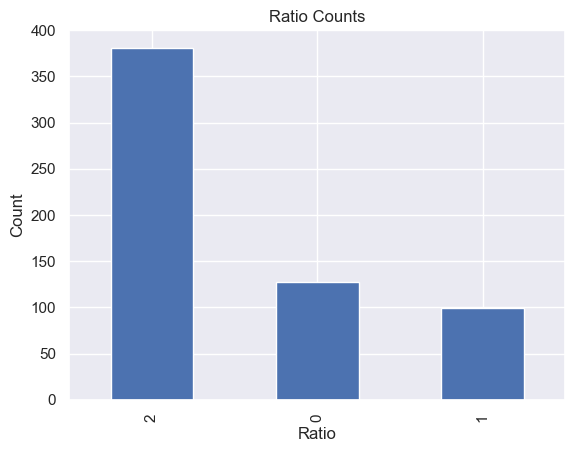

In [17]:
domain = dsdata['remote_ratio']
counts = domain.value_counts()
counts.plot(kind='bar')
plt.title('Ratio Counts')
plt.xlabel('Ratio')
plt.ylabel('Count')
plt.show()

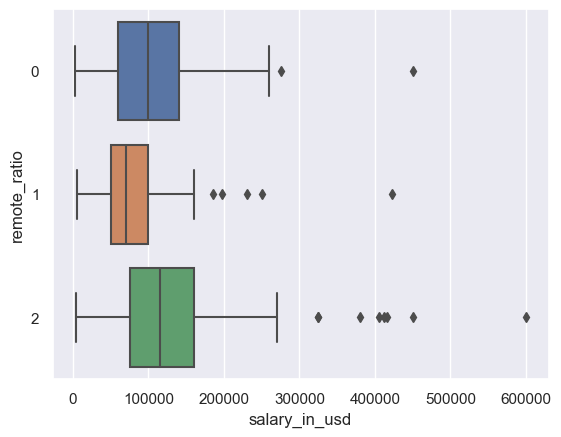

In [18]:
sb.boxplot(data=dsdata, x='salary_in_usd', y='remote_ratio', orient="h")
plt.show()

In [19]:
dsdata.corr()

,Index,work_year,salary,salary_in_usd,remote_ratio,experience_levelN,company_sizeN,employment_typeN
Index,1.000000,0.886550,-0.096250,0.167025,0.095000,0.249966,-0.090137,0.004078
work_year,0.886550,1.000000,-0.087577,0.170493,0.076314,0.294759,-0.078764,-0.012819
salary,-0.096250,-0.087577,1.000000,-0.083906,-0.014608,-0.027517,0.079959,-0.002470
salary_in_usd,0.167025,0.170493,-0.083906,1.000000,0.132122,0.484233,0.151205,0.065747
remote_ratio,0.095000,0.076314,-0.014608,0.132122,1.000000,0.097784,-0.022070,0.015638
experience_levelN,0.249966,0.294759,-0.027517,0.484233,0.097784,1.000000,0.063511,0.081701
company_sizeN,-0.090137,-0.078764,0.079959,0.151205,-0.022070,0.063511,1.000000,0.027133
employment_typeN,0.004078,-0.012819,-0.002470,0.065747,0.015638,0.081701,0.027133,1.000000


Remote_ratio does not appear to be affected by much.

In [23]:
remoteCompany = pd.DataFrame(dsdata[['remote_ratio','company_continent']])
remoteCompany.head()

,remote_ratio,company_continent
0,0,EUROPE
1,0,ASIA
2,1,EUROPE
3,0,NORTH AMERICA
4,1,NORTH AMERICA


In [30]:
remoteCompany = pd.get_dummies(remoteCompany)
remoteCompany.head()

,remote_ratio,company_continent_AFRICA,company_continent_ASIA,company_continent_AUSTRALIA,company_continent_EUROPE,company_continent_NORTH AMERICA,company_continent_SOUTH AMERICA
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,1,0,0,0,1,0,0
3,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0


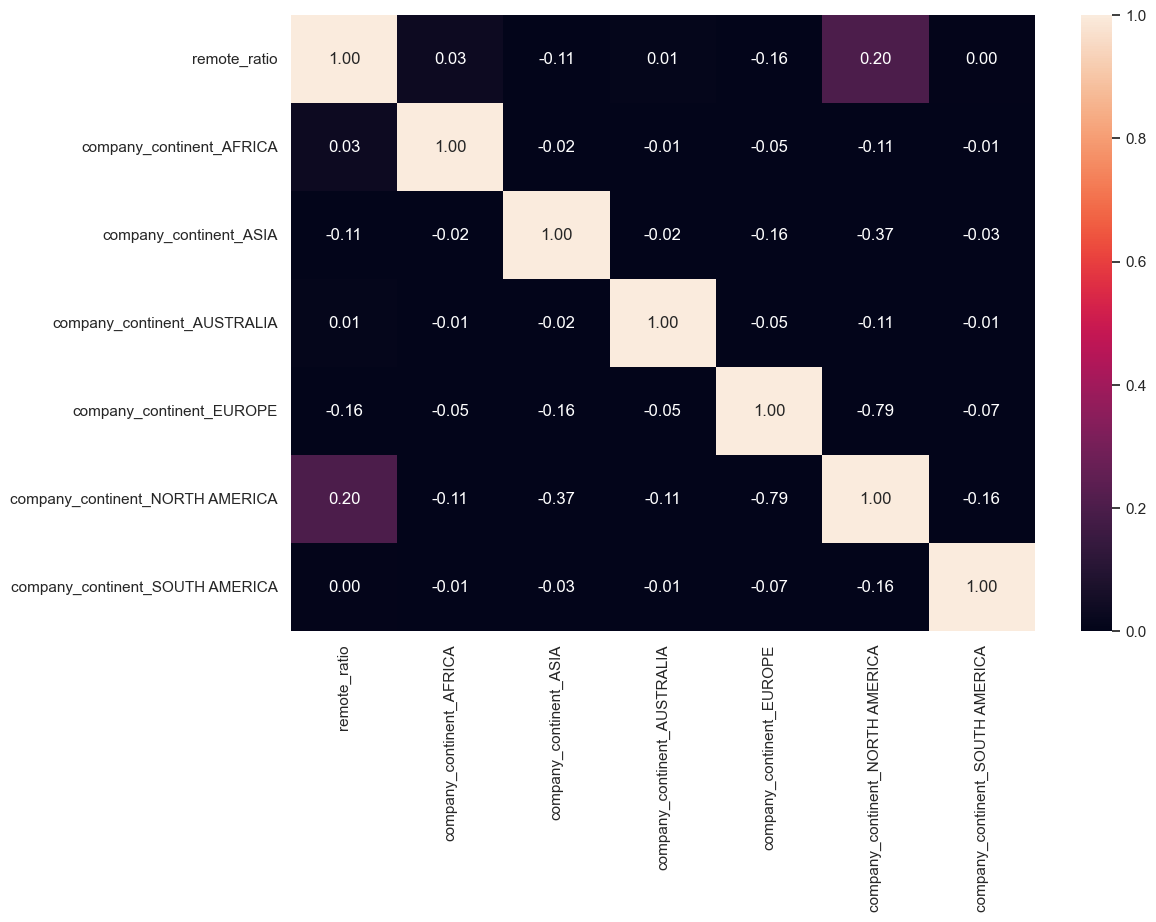

In [25]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(remoteCompany.corr(), vmin = 0, vmax = 1, annot = True, fmt = ".2f")
plt.show()

In [26]:
remoteEmployee = pd.DataFrame(dsdata[['remote_ratio','employee_continent']])
remoteEmployee.head()

,remote_ratio,employee_continent
0,0,EUROPE
1,0,ASIA
2,1,EUROPE
3,0,NORTH AMERICA
4,1,NORTH AMERICA


In [29]:
remoteEmployee = pd.get_dummies(remoteEmployee)
remoteEmployee.head()

,remote_ratio,employee_continent_AFRICA,employee_continent_ASIA,employee_continent_AUSTRALIA,employee_continent_EUROPE,employee_continent_NORTH AMERICA,employee_continent_SOUTH AMERICA
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,1,0,0,0,1,0,0
3,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0


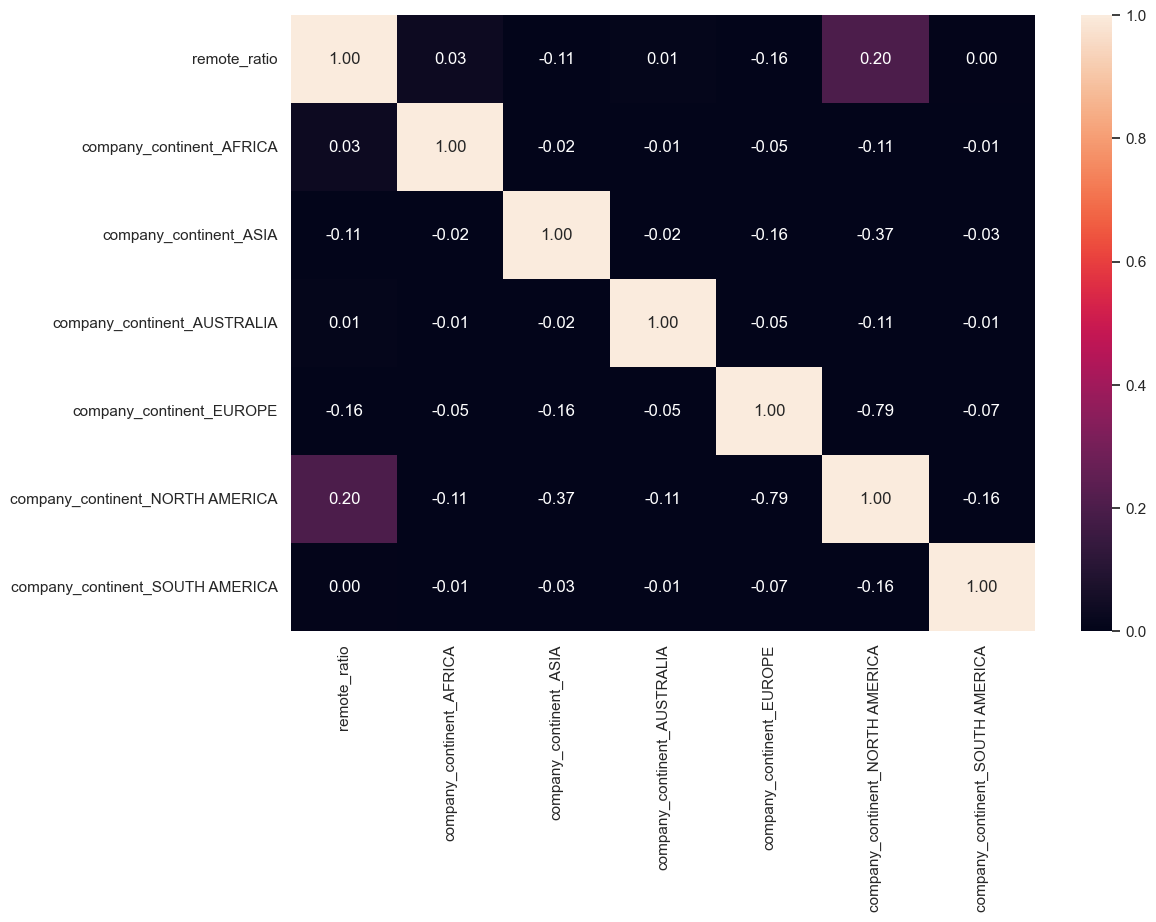

In [28]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(remoteCompany.corr(), vmin = 0, vmax = 1, annot = True, fmt = ".2f")
plt.show()